The point of this notebook is to investigate the relationship between the number of proteins and the number of mRNAs carrying that protein. In particular, it looks like there are two proteins that are present on 14 different transcripts. We would like to understand why one of the proteins is present in more copies than the other protein, given that transcription rates and translation rates are identical.

# Which are the proteins that are present on 14 mRNAs?

In [20]:
protein_file = "gene_expression/aggregated_constant"

In [47]:
import sys
import pandas

In [22]:
sys.path.append("gene_expression/scripts/")

In [45]:
from number_proteins import ProteinStats
from output_molecules import SimulationFiles

In [25]:
my_proteins = ProteinStats(protein_file)

In [26]:
max(my_proteins.proteins.count.values())

18

In [27]:
candidates = [k for k, v in my_proteins.proteins.count.items() if v == 14]

In [28]:
candidates

['ybaJ_BSU01510',
 'ylxS_BSU16590',
 'nusA_BSU16600',
 'ylxR_BSU16610',
 'rplGA_BSU16620',
 'infB_BSU16630']

In [34]:
for c in candidates:
    print(c, my_proteins.final_numbers[my_proteins.ids.index(c)])

ybaJ_BSU01510 7484
ylxS_BSU16590 3133
nusA_BSU16600 3150
ylxR_BSU16610 3129
rplGA_BSU16620 3092
infB_BSU16630 3100


So for some reason ybaJ is way over the top. It's strange that all other mRNAs are consistent. Let's do some basic math here maybe. Every protein is on 14 mRNAs, the simulation runs for 3000s, promoter k_on is 1, k_off is -1, same thing for RBS. There are 18k ribosomes and 1k RNAPs.

Because all RNAs have equal binding strengths, we expect RNAPs to not choose one RNA over the other, or ribosomes to make one protein rather than one other one.

Actually, while this idea is cute, I just remembered that there is a limited number of mRNAs. So the first question we need to ask is: where do the proteins come from? Is the imbalance already present at the mRNA level?

In [41]:
rnas = {c: [rna for prot, rna in my_proteins.proteins.elements if prot == c] for c in candidates}

In [42]:
rnas

{'ybaJ_BSU01510': ['U81',
  'U79',
  'U83',
  'U84',
  'U86',
  'U88',
  'U90',
  'U94',
  'U97',
  'U98',
  'U102',
  'U100',
  'U104',
  'U103'],
 'ylxS_BSU16590': ['U1312',
  'U1313',
  'U1315',
  'U1317',
  'U1319',
  'U1321',
  'U1324',
  'U1323',
  'U1327',
  'U1328',
  'U1329',
  'U1330',
  'U1332',
  'U1331'],
 'nusA_BSU16600': ['U1312',
  'U1313',
  'U1315',
  'U1317',
  'U1319',
  'U1321',
  'U1324',
  'U1323',
  'U1327',
  'U1328',
  'U1329',
  'U1330',
  'U1332',
  'U1331'],
 'ylxR_BSU16610': ['U1312',
  'U1313',
  'U1315',
  'U1317',
  'U1319',
  'U1321',
  'U1324',
  'U1323',
  'U1327',
  'U1328',
  'U1329',
  'U1330',
  'U1332',
  'U1331'],
 'rplGA_BSU16620': ['U1312',
  'U1313',
  'U1315',
  'U1317',
  'U1319',
  'U1321',
  'U1324',
  'U1323',
  'U1327',
  'U1328',
  'U1329',
  'U1330',
  'U1332',
  'U1331'],
 'infB_BSU16630': ['U1312',
  'U1313',
  'U1315',
  'U1317',
  'U1319',
  'U1321',
  'U1324',
  'U1323',
  'U1327',
  'U1328',
  'U1329',
  'U1330',
  'U1332',
  '

Okay so this explains the consistency of all the mRNAs that have around 3k proteins.

In [48]:
files = SimulationFiles(protein_file)
chemicals = pandas.read_csv(files.output_path('chemicals.out'),
                            sep='\t')
final_numbers = chemicals.iloc[-1]

In [53]:
rnas['ybaJ_BSU01510']
rnas['ylxS_BSU16590']

['U1312',
 'U1313',
 'U1315',
 'U1317',
 'U1319',
 'U1321',
 'U1324',
 'U1323',
 'U1327',
 'U1328',
 'U1329',
 'U1330',
 'U1332',
 'U1331']

In [81]:
outlier_rnas = {r: final_numbers[r] for r in rnas['ybaJ_BSU01510']}
common_rnas = {r: final_numbers[r] for r in rnas['ylxS_BSU16590']}

In [82]:
outlier_rnas

{'U81': 23,
 'U79': 23,
 'U83': 0,
 'U84': 37,
 'U86': 29,
 'U88': 28,
 'U90': 36,
 'U94': 28,
 'U97': 45,
 'U98': 30,
 'U102': 38,
 'U100': 0,
 'U104': 30,
 'U103': 39}

In [83]:
common_rnas

{'U1312': 16,
 'U1313': 12,
 'U1315': 0,
 'U1317': 14,
 'U1319': 8,
 'U1321': 8,
 'U1324': 12,
 'U1323': 0,
 'U1327': 0,
 'U1328': 22,
 'U1329': 23,
 'U1330': 17,
 'U1332': 20,
 'U1331': 0}

In [84]:
sum(outlier_rnas.values())

386

In [85]:
sum(common_rnas.values())

152

So the difference in expression is actually explained at the RNA level. Why is it that some mRNAs are expressed at such high levels?

In [62]:
final_numbers

time                   3000
rna_tracker           45731
protein_tracker     3246032
dATP               97655242
dCTP               98192081
dGTP               98192044
dTTP               97655356
ATP                 4200000
CTP                  120000
GTP                 3000000
UTP                  300000
chromosome                1
U1                       36
U4                       38
U5                       36
U10                      32
U13                      31
U726                     36
U727                     22
U728                     31
U733                     28
U734                     31
U1.1                     36
U4.1                     38
U5.1                     36
U11                       0
U10.1                    32
U13.1                    31
U15                      26
U19                      38
                     ...   
yclN_BSU03800          1082
yjcO_BSU11930           619
ycbJ_BSU02520          1699
yttB_BSU30350           520
sdpB_BSU33760       

There are 45731 transcripts at the end of the simulation.

In [70]:
all_rnas = [name for name in final_numbers.index if name[0] == 'U']

In [77]:
all_rnas.remove('UTP')

In [78]:
len(all_rnas)

2632

There are 2632 rnas, so the average number of mRNA copy is

In [74]:
45731 / 2632

17.375

It looks like the outlier RNAs are the real outliers here. Why would they be expressed at twice the average value?

In [87]:
import matplotlib.pyplot as plt
import numpy as np

In [79]:
all_rnas_expr = [final_numbers[r] for r in all_rnas]

(array([953.,  20., 271., 500., 542., 280.,  50.,  13.,   2.,   1.]),
 array([ 0. ,  6.7, 13.4, 20.1, 26.8, 33.5, 40.2, 46.9, 53.6, 60.3, 67. ]),
 <a list of 10 Patch objects>)

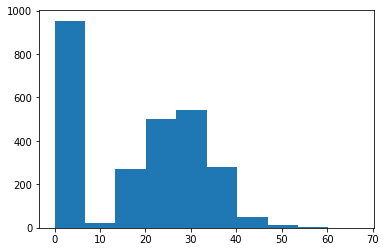

In [80]:
plt.hist(all_rnas_expr)

Hmm actually a large number of mRNAs are not expressed, shifting the average to around 30, so the outlier is not really an outlier anymore?

Well it simply looks like a lot of mRNAs are not expressed because their sigma factor is not present. Let's remove zero counts here and look at the distribution again.

In [91]:
total_rna_expr = 45731
all_rnas_expr = np.array(all_rnas_expr)
total_rna_expr / sum(all_rnas_expr != 0)

27.156175771971498

(array([  5.,  39., 252., 600., 442., 280.,  51.,  12.,   2.,   1.]),
 array([ 1. ,  7.6, 14.2, 20.8, 27.4, 34. , 40.6, 47.2, 53.8, 60.4, 67. ]),
 <a list of 10 Patch objects>)

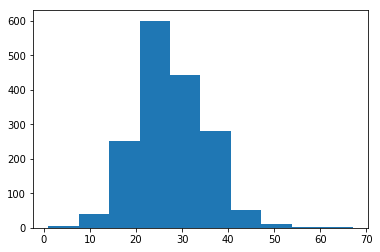

In [99]:
plt.hist(all_rnas_expr[all_rnas_expr != 0])

(array([4., 0., 0., 2., 0., 2., 2., 1., 1., 2.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

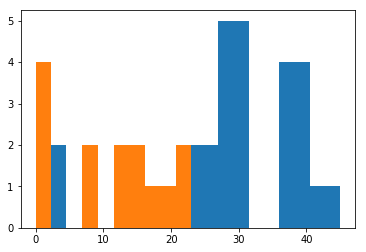

In [98]:
plt.hist(outlier_rnas.values())
plt.hist(common_rnas.values())

In [110]:
outliers = np.array(list(outlier_rnas.values()))
outliers = outliers[outliers != 0]
commons = np.array(list(common_rnas.values()))
commons = commons[commons != 0]

In [113]:
print(np.average(outliers))
print(np.average(commons))

32.166666666666664
15.2


The two distribution are quite extreme, but it's shocking how low the "common" values are... Maybe it's just a size problem?

In [114]:
from chemical_sequences import Rnas

In [115]:
my_rnas = Rnas("gene_expression/aggregated_constant/input/rnas.in")

In [118]:
rna_length = {r: int(l[1]) - int(l[0]) for r, l in my_rnas.start_and_stop.items()}

In [127]:
my_rna_expr = [final_numbers[r] for r in rna_length]

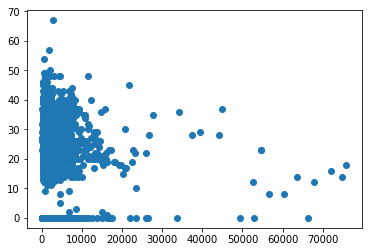

In [133]:
plt.scatter(rna_length.values(), my_rna_expr)

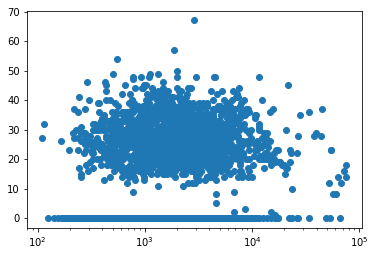

In [132]:
plt.scatter(rna_length.values(), my_rna_expr)
ax = plt.gca()
ax.set_xscale('log')

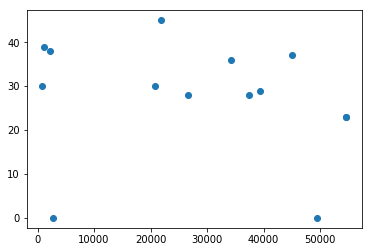

In [129]:
my_rna_length = [rna_length[r] for r in outlier_rnas]
plt.scatter(my_rna_length, outlier_rnas.values())

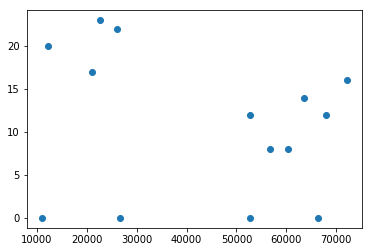

In [131]:
my_rna_length = [rna_length[r] for r in common_rnas]
plt.scatter(my_rna_length, common_rnas.values())

It's possible that there is a sligth downward trend with size, that RNAPs get stalled along the very long RNAs when nucleotides go lacking.

It's also strange that the "outliers" are consistently high.

Some subtle biases may be at play here, but it's pretty difficult to judge.